In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
from scipy.sparse import diags

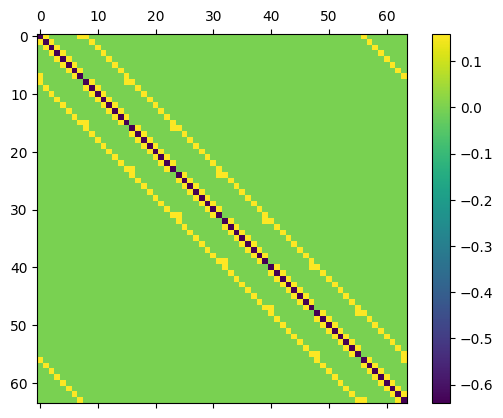

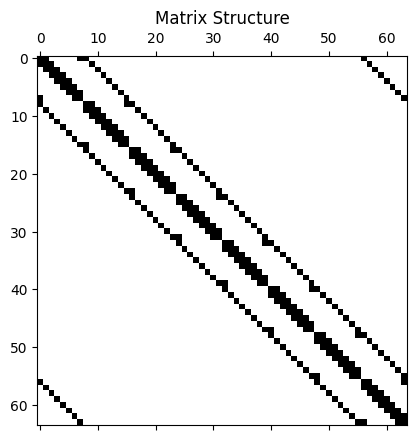

In [64]:
m = 8
n = m * m
L = 10
x = [-L, L]
y = [-L, L]
delta = 2*L / m


e0 = np.zeros((n, 1))
e1 = np.ones((n, 1))
e2 = np.copy(e1)
e4 = np.copy(e0)

for j in range(1, m+1):
    e2[m*j-1] = 0
    e4[m*j-1] = 1

e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]

e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

diagonals = [e1.flatten(), e1.flatten(), e5.flatten(), 
             e2.flatten(), -4 * e1.flatten(), e3.flatten(), 
             e4.flatten(), e1.flatten(), e1.flatten()]
offsets = [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)]

matA = spdiags(diagonals, offsets, n, n).toarray()
matA = matA/(delta**2)

fig, ax = plt.subplots()
cax = ax.matshow(matA)
fig.colorbar(cax)

A1 = matA

plt.figure(5)
plt.spy(matA)
plt.title('Matrix Structure')
plt.show()

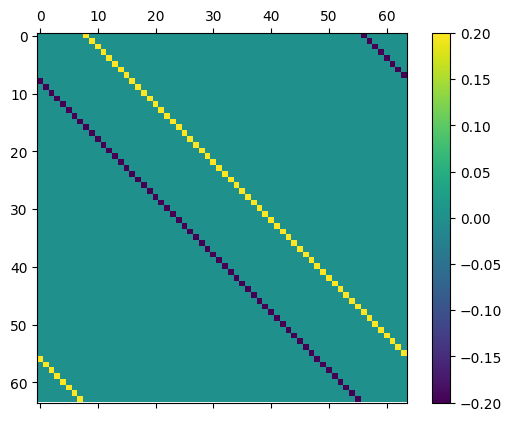

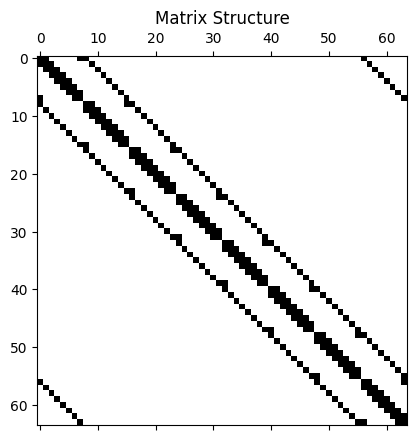

In [65]:
m = 8
n = m * m
L = 10
x = [-L, L]
y = [-L, L]
delta = (2*L/m)

e0 = np.zeros((n, 1))
e1 = np.ones((n, 1))

diagonals = [e1.flatten(), -e1.flatten(), e1.flatten(), -e1.flatten()]
offsets = [-n+m, -m, m, n-m]

matB = spdiags(diagonals, offsets, n, n).toarray()
matB = matB / (2* delta)

fig, ax = plt.subplots()
cax = ax.matshow(matB)
fig.colorbar(cax)

A2 = matB

plt.figure(5)
plt.spy(matA)
plt.title('Matrix Structure')
plt.show()

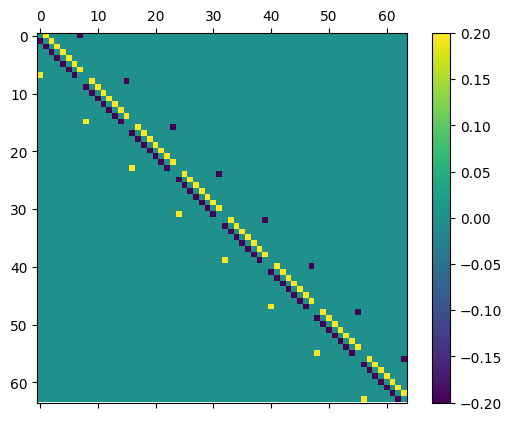

In [66]:
m = 8
n = m * m
L = 10
x = [-L, L]
y = [-L, L]
delta = (2*L/m)

e0 = np.zeros((n, 1))
e1 = np.ones((n, 1))

diagonals = [e1.flatten(), -e1.flatten()]
offsets = [1, -1]

matC = spdiags(diagonals, offsets, n, n).toarray()

for i in range(m):
    matC[i * 8 + 7, i*8] = 1
    matC[i*8, i*8+7] = -1
    matC[i*8, i*8 - 1] = 0
    matC[i*8 - 1, i*8] = 0

matC = matC / (2* delta)

A3 = matC

fig, ax = plt.subplots()
cax = ax.matshow(matC)
fig.colorbar(cax)